### L9 Cert Work
importing libraries
pandas for data frames and matplotlib for visualizations and graphs

In [1]:
import pandas as pd
import matplotlib as plt

### loading and inspecting the dataset (first 10rows)

In [2]:
tm=pd.read_csv("TMQ10_overseas_trips.csv")
tm.head(10)

,Statistic Label,Area of Residence,Quarter,UNIT,VALUE
0,Overseas Trips to Ireland,All trips to Ireland,2008Q1,Thousand,1542.2
1,Overseas Trips to Ireland,All trips to Ireland,2008Q2,Thousand,2159.4
2,Overseas Trips to Ireland,All trips to Ireland,2008Q3,Thousand,2472.4
3,Overseas Trips to Ireland,All trips to Ireland,2008Q4,Thousand,1665.0
4,Overseas Trips to Ireland,All trips to Ireland,2009Q1,Thousand,1402.2
5,Overseas Trips to Ireland,All trips to Ireland,2009Q2,Thousand,1901.9
6,Overseas Trips to Ireland,All trips to Ireland,2009Q3,Thousand,2177.3
7,Overseas Trips to Ireland,All trips to Ireland,2009Q4,Thousand,1446.1
8,Overseas Trips to Ireland,All trips to Ireland,2010Q1,Thousand,1084.8
9,Overseas Trips to Ireland,All trips to Ireland,2010Q2,Thousand,1541.4


#### tm.shape for loking how many rows and columns in shape of dataset 

In [5]:
tm.shape      # dataset has 336 rows and 5 columns

(336, 5)

### I'm using info() to see what dataset look like-
- how many total values it has how many of then non-missing and 
 - which columns are type of flost or object

In [7]:
tm.info()      # i saw that dataset has 336 in total, in the Value only 24 non-null
               # ther are some missing value in that column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    336 non-null    object 
 1   Area of Residence  336 non-null    object 
 2   Quarter            336 non-null    object 
 3   UNIT               336 non-null    object 
 4   VALUE              240 non-null    float64
dtypes: float64(1), object(4)
memory usage: 13.3+ KB


### cheking missing values for whole dataset

In [15]:
print("Missing values per column:")
print(tm.isnull().sum())               # also i can check only for one column  tm{"Value"}

Missing values per column:
Statistic Label       0
Area of Residence     0
Quarter               0
UNIT                  0
VALUE                96
dtype: int64


### Next step i want understand the overal distribution of the numbers and to check if ther are unusual or extreme values
it will help to understand the remaining values sfter finding missing data i can decide how to handle the nulls.

In [16]:
tm.describe()

,VALUE
count,240.000000
mean,816.661250
std,730.467165
min,48.800000
25%,231.450000
50%,675.350000
75%,1030.000000
max,3334.400000


# Exploratory step


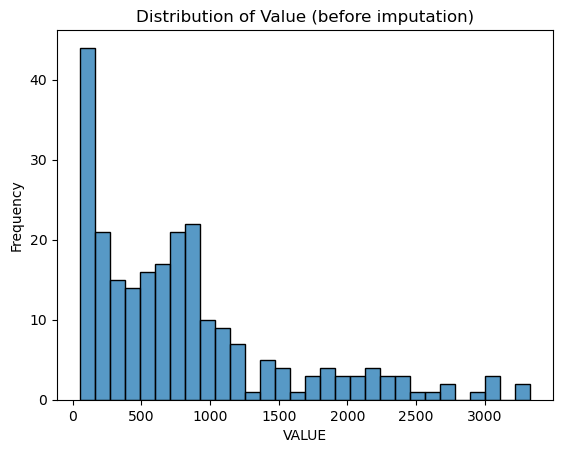

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tm["VALUE"], bins=30, kde=False)
plt.title("Distribution of Value (before imputation)")
plt.xlabel("VALUE")
plt.ylabel("Frequency")
plt.show()

### boxplot for outliers

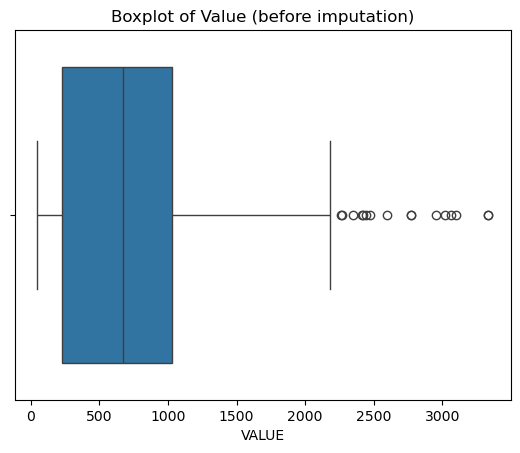

In [23]:
sns.boxplot(x=tm["VALUE"])
plt.title("Boxplot of Value (before imputation)") 
plt.xlabel("VALUE")
plt.show()

####When data has outliers better to use median is better choice for imputation

In [27]:
tm["VALUE"] = pd.to_numeric(tm["VALUE"], errors="coerce")
value_mean = tm["VALUE"].mean()
print("Mean of VALUE:", value_mean)
tm['VALUE'] = tm['VALUE'].fillna(value_mean)
print("\nMissing values in 'VALUE' after replacement:")
print(tm["VALUE"].isnull().sum())

Mean of VALUE: 816.66125

Missing values in 'VALUE' after replacement:
0


###handling Missing Values I used "fillna()" with implace True, but it produced a Future Warning. Then a replaced it with: tm["Value"] filna(value_mean)